In [2]:
import pandas as pd
import geopandas as gpd

import os

import contextily as ctx
import matplotlib.pyplot as plt
%matplotlib inline

## Local Authorities: Downloaded dataset

https://geoportal.statistics.gov.uk/datasets/local-athority-districts-december-2018-boundaries-gb-bfc

In [6]:
la = gpd.read_file("../data/raw/la")

In [7]:
la.head()

objectid    lad18cd               lad18nm lad18nmw   bng_e   bng_n  \
0         1  E06000001            Hartlepool     None  447157  531476   
1         2  E06000002         Middlesbrough     None  451141  516887   
2         3  E06000003  Redcar and Cleveland     None  464359  519597   
3         4  E06000004      Stockton-on-Tees     None  444937  518183   
4         5  E06000005            Darlington     None  428029  515648   

      long        lat    st_areasha     st_lengths  \
0 -1.27023  54.676201  9.355951e+07   71707.162397   
1 -1.21099  54.544701  5.388858e+07   43840.876046   
2 -1.00611  54.567501  2.448203e+08   97993.352238   
3 -1.30669  54.556900  2.049622e+08  119581.539702   
4 -1.56835  54.535301  1.974757e+08  107206.282970   

                                            geometry  
0  MULTIPOLYGON (((447213.900 537036.104, 447228....  
1  MULTIPOLYGON (((448958.901 521835.695, 449045....  
2  MULTIPOLYGON (((455752.600 528195.705, 455738....  
3  MULTIPOLYGON (((444157.002 527956.304, 444165....  
4  POLYGON ((436388.002 522354.197, 436392.298 52...

(-26993.59147500028, 688151.3879750004, -55410.27873499999, 1281049.6820350003)

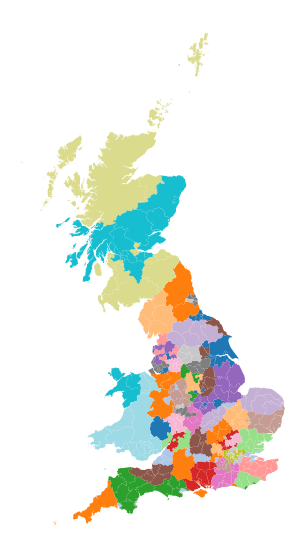

In [4]:
la.plot(cmap='tab20', figsize=(20,10))
plt.axis('off')

## Output Areas: Downloaded dataset
https://geoportal.statistics.gov.uk/datasets/output-area-december-2011-full-clipped-boundaries-in-england-and-wales?geometry=-1.623%2C54.976%2C-1.600%2C54.980

In [5]:
oa = gpd.read_file("../data/raw/oa")

In [6]:
oa.head()

objectid     oa11cd    lad11cd    st_areasha   st_lengths  \
0         1  E00000001  E09000001   6707.114639   448.117955   
1         2  E00000003  E09000001   4186.859841   341.806167   
2         3  E00000005  E09000001   8736.114423   444.386358   
3         4  E00000007  E09000001  73494.467622  1607.081131   
4         5  E00000010  E09000001   2533.057603   259.046872   

                                            geometry  
0  POLYGON ((532303.125 181877.594, 532301.345 18...  
1  POLYGON ((532198.818 181863.087, 532192.305 18...  
2  POLYGON ((532178.979 181764.041, 532180.131 18...  
3  POLYGON ((532201.292 181668.180, 532205.000 18...  
4  POLYGON ((532127.958 182133.192, 532106.413 18...

(54025.36499999999, 684251.3350000002, -27271.9100499996, 690143.9110499998)

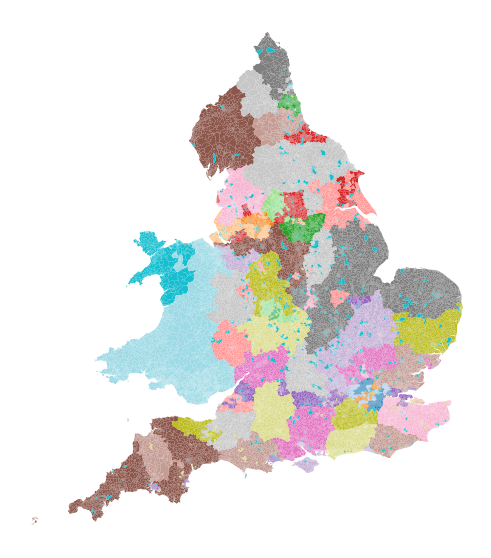

In [7]:
oa.plot(cmap='tab20', figsize=(20,10))
plt.axis('off')

## Newcastle upon Tyne Local Authority

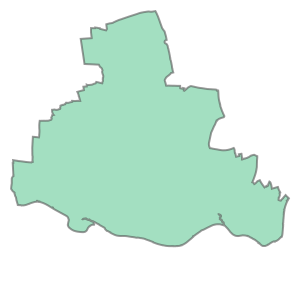

In [8]:
tyne_la = la[la["lad18nm"] == "Newcastle upon Tyne"].iloc[0]
tyne_la["geometry"]

## Output areas intersecting Newcastle Upon Tyne Local Authority

In [113]:
tyne_oa = oa[oa.intersects(tyne_la["geometry"])]

Captured output areas compared with local authority boundary:

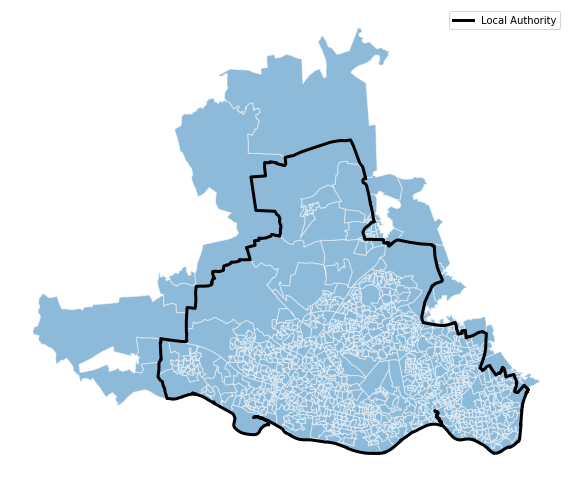

In [114]:
ax = plt.figure(figsize=(10,10)).gca()
x,y = tyne_la["geometry"].exterior.xy
ax.plot(x,y, 'k', linewidth=3)
tyne_oa.plot(alpha=0.5, ax=ax, edgecolor='white')
plt.axis('off')
plt.legend(["Local Authority"])

## With a base map (contextily)

https://geopandas.readthedocs.io/en/latest/gallery/plotting_basemap_background.html

Alternative map tiles:
https://wiki.openstreetmap.org/wiki/Tile_servers

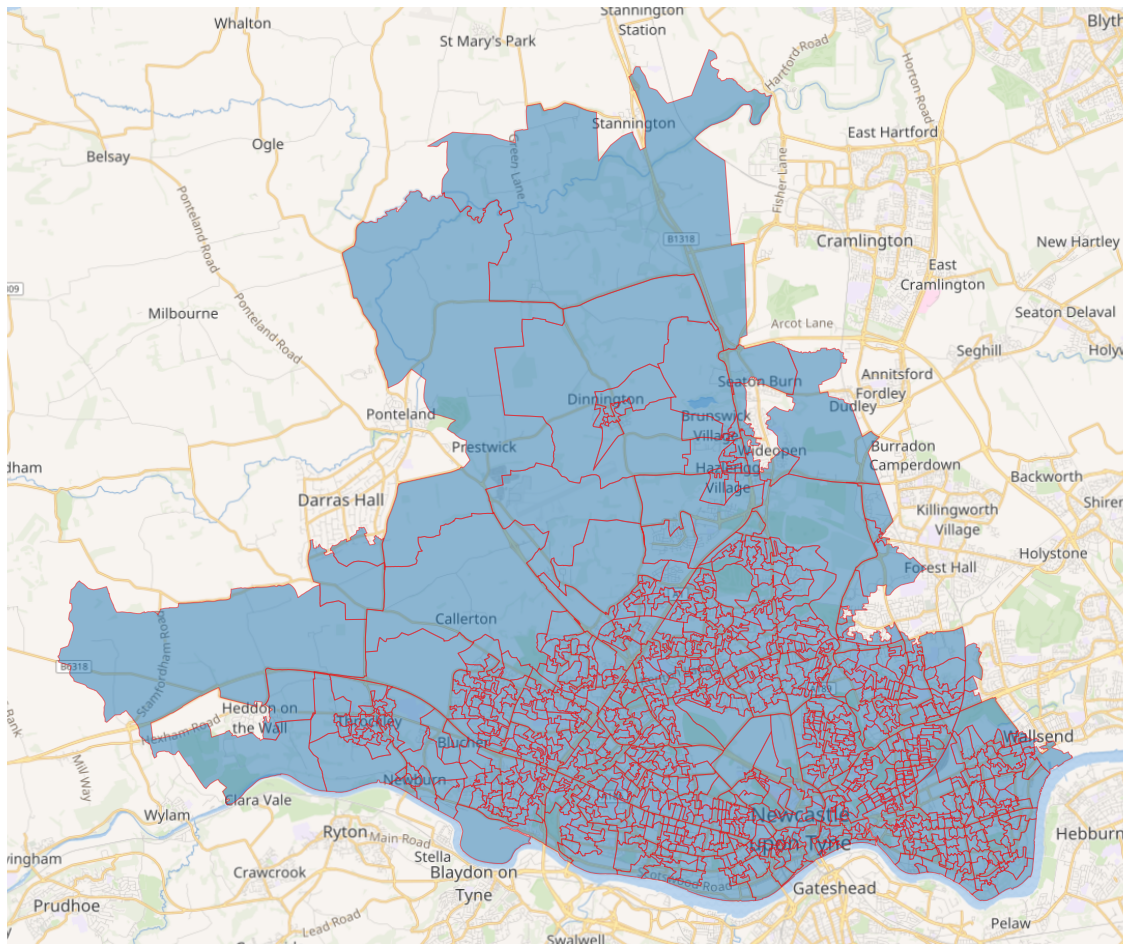

In [11]:
ax = tyne_oa.plot(figsize=(20,20),alpha=0.5, edgecolor="red")
ctx.add_basemap(ax,
                url="https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}.png",
                crs=tyne_oa.crs)
ax.set_axis_off()

## Population Centroids
https://geoportal.statistics.gov.uk/datasets/output-areas-december-2011-population-weighted-centroids?geometry=-1.806%2C54.947%2C-1.440%2C55.016

In [12]:
centroids = gpd.read_file("../data/raw/centroids")
centroids.head()

X           Y  objectid     oa11cd
0  450159.431  531764.977       201  E00060262
1  448798.945  530276.749       202  E00060405
2  452841.465  533975.910       203  E00060484
3  450350.909  531759.635       204  E00060263
4  448725.664  529513.601       205  E00060402

## Population Estimates
https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/censusoutputareaestimatesinthenortheastregionofengland

In [13]:
populations = pd.read_csv("../data/populations.csv")
populations["Population"] = populations["Population"].str.replace(",", "").astype(int)
populations.head()

OA11CD  Population
0  E00041378         292
1  E00041381         268
2  E00041382         171
3  E00041383         350
4  E00041386         568

In [ ]:
tyne_oa_crs = tyne_oa.to_crs(tyne_oa.crs)
tyne_oa_crs["area"] = tyne_oa_crs['geometry'].area/ 10**6
display(tyne_oa_crs.head())

display(tyne_oa_crs["area"].describe())

tyne_oa_crs.plot(column="area",
                 cmap="Reds",
                 figsize=(10,10),
                 legend=True)

In [14]:
ne_pop_with_centroids = centroids.merge(populations, left_on='oa11cd', right_on='OA11CD')
ne_pop_with_centroids.drop("OA11CD", axis=1, inplace=True)
ne_pop_with_centroids.head()

X           Y  objectid     oa11cd  Population
0  450159.431  531764.977       201  E00060262         181
1  448798.945  530276.749       202  E00060405         333
2  452841.465  533975.910       203  E00060484         316
3  450350.909  531759.635       204  E00060263         206
4  448725.664  529513.601       205  E00060402         290

In [15]:
tyne_oa = tyne_oa.merge(ne_pop_with_centroids[["X", "Y", "oa11cd", "Population"]],
                        how="left", on="oa11cd")


tyne_oa.head()

objectid     oa11cd    lad11cd     st_areasha   st_lengths  \
0     40744  E00042042  E08000021   70646.968938  2005.364898   
1     40745  E00042043  E08000021   46610.454211  1328.957568   
2     40746  E00042044  E08000021   58693.069365  1663.764939   
3     40747  E00042045  E08000021   21401.770445   712.782318   
4     40748  E00042046  E08000021  149085.377199  2866.342992   

                                            geometry           X           Y  \
0  POLYGON ((421301.772 564928.429, 421301.755 56...  421259.393  564639.754   
1  POLYGON ((420572.364 564892.821, 420572.312 56...  420448.616  564819.213   
2  POLYGON ((420492.559 564780.806, 420492.590 56...  420509.207  564622.209   
3  POLYGON ((421543.715 563955.116, 421542.251 56...  421551.722  564088.460   
4  POLYGON ((422292.813 563736.716, 422265.374 56...  422116.597  563648.529   

   Population   density  
0         310  0.004388  
1         304  0.006522  
2         246  0.004191  
3         201  0.009392  
4         424  0.002844

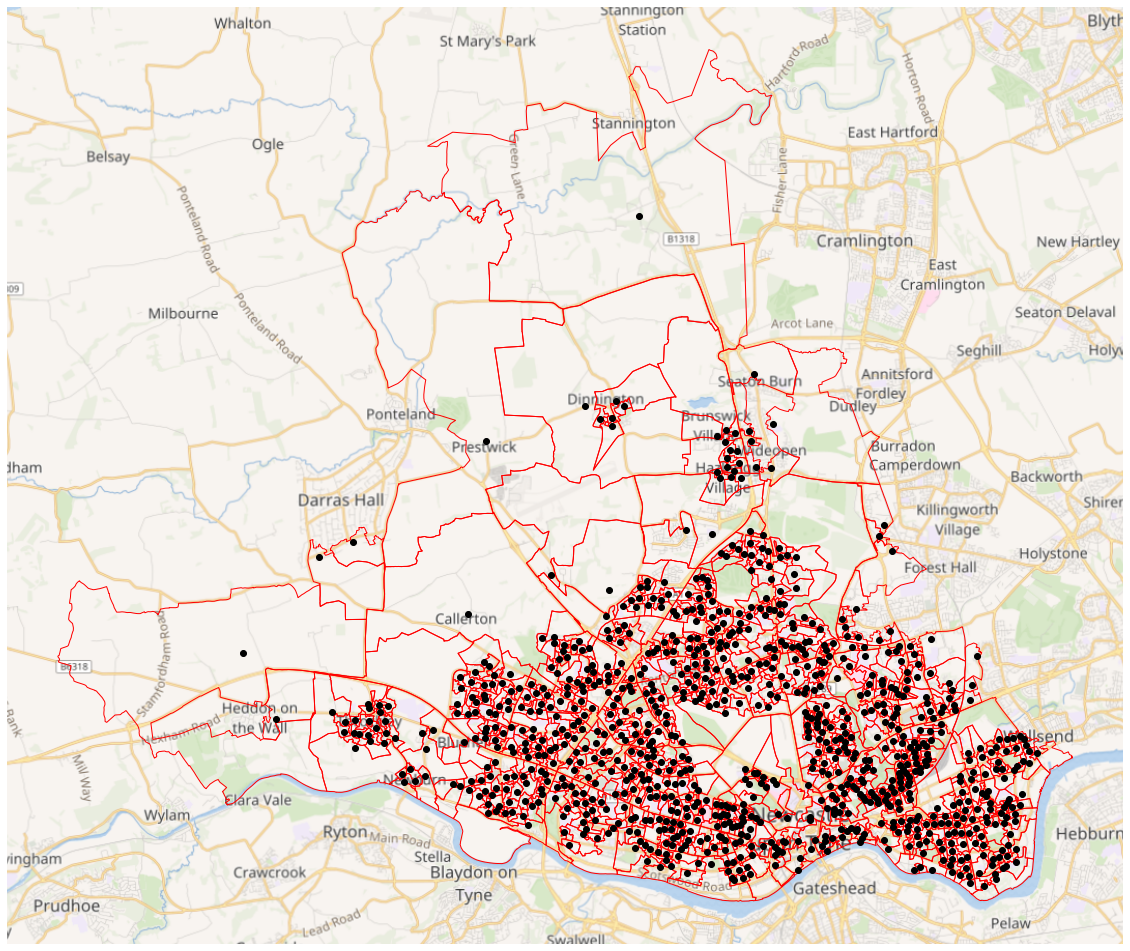

In [45]:
ax = tyne_oa.plot(figsize=(20,20), facecolor='none', edgecolor='red', linewidth=1)
ctx.add_basemap(ax,
                url="https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}.png",
                crs=tyne_oa.crs)

x = tyne_oa["X"].values
y = tyne_oa["Y"].values
ax.scatter(x, y, color='k')

ax.set_axis_off()

## Density

In [93]:
tyne_oa["density"] = tyne_oa["Population"] / tyne_oa["geometry"].area

# binned by decile
tyne_oa["density_bin"] = pd.qcut(tyne_oa["density"], q=10)

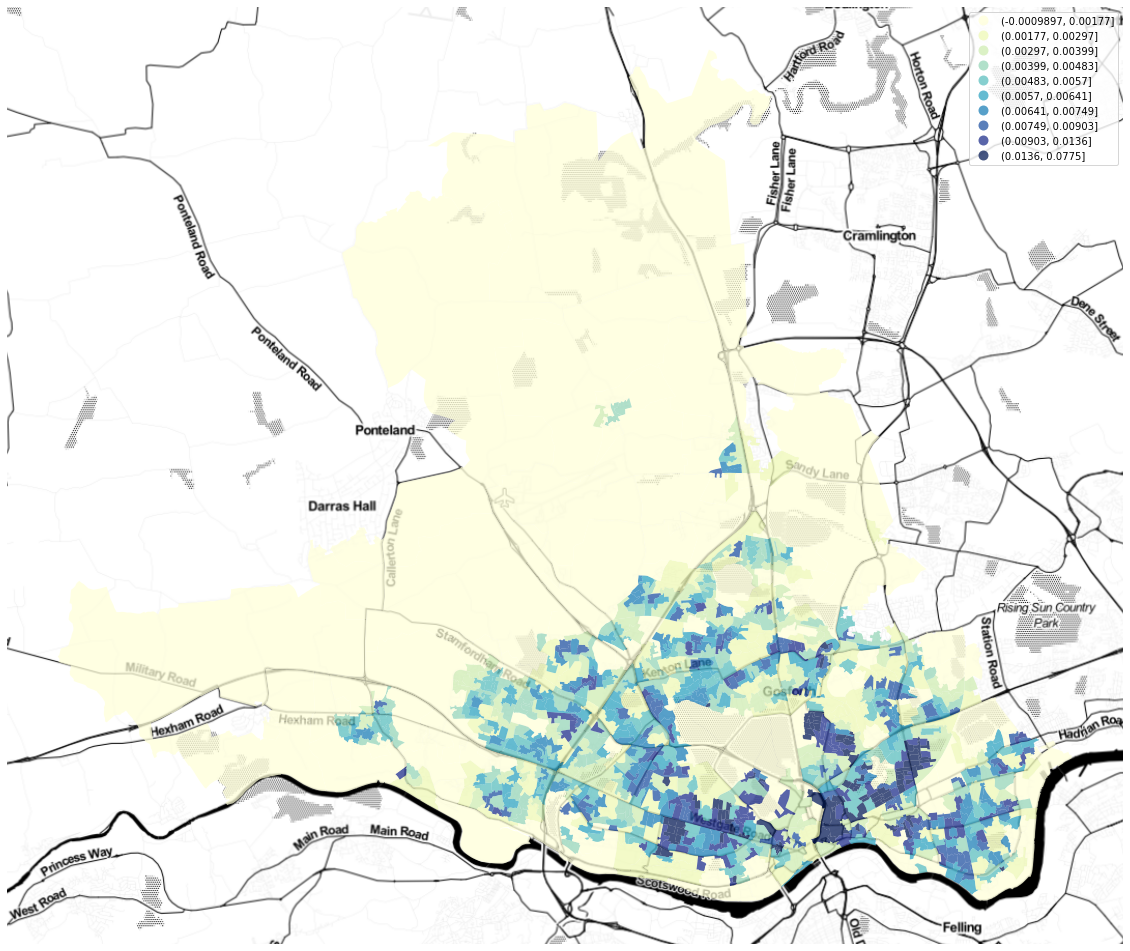

In [106]:
ax = tyne_oa.plot(column="density_bin",
                  figsize=(20,20),alpha=0.75,
                  cmap="YlGnBu", legend=True)

ctx.add_basemap(ax,
                url="http://a.tile.stamen.com/toner/{z}/{x}/{y}.png",
                crs=tyne_oa.crs)

ax.set_axis_off()

## Save dataframe

In [112]:
select_cols = ["oa11cd", "lad11cd", "geometry", "X", "Y", "Population"]
save_dir = "../data/processed/tyne_oa"

os.makedirs(save_dir, exist_ok=True)

tyne_oa[select_cols].to_file(save_dir + "/tyne_oa.shp")

In [12]:
la.to_crs(epsg=27700, inplace=True)

In [13]:
la.crs

{'init': 'epsg:27700'}